In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv(r'C:\Users\Personal\Downloads\fake_or_real_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
print(df.shape)

(6335, 4)


In [5]:
df.isnull().any()


Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [6]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [7]:
sep=df.label.value_counts()
sep

REAL    3171
FAKE    3164
Name: label, dtype: int64

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'News published')

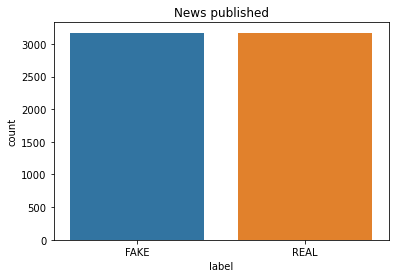

In [8]:
sns.countplot(df.label)
plt.title("News published")

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=0)

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_trainnb=tfidf_train.toarray()
tfidf_test=tfidf_vectorizer.transform(x_test)
tfidf_testnb=tfidf_test.toarray()

In [11]:
%%time
logreg = LogisticRegression()
logreg.fit(tfidf_train,y_train)

Wall time: 7.1 s


LogisticRegression()

In [12]:
y_predlg=logreg.predict(tfidf_test)
lgscore=accuracy_score(y_test,y_predlg)
print(f'Accuracy: {round(lgscore*100,2)}%')

Accuracy: 91.55%


In [13]:
%%time
gnb = GaussianNB()
gnb.fit(tfidf_trainnb,y_train)

Wall time: 2min 6s


GaussianNB()

In [19]:
y_pred_nb = gnb.predict(tfidf_tey_pred_nb = gnb.predict(tfidf_testnb)
nbscore=accuracy_score(y_test,y_pred_nb)
print(f'Accuracy: {round(nbscore*100,2)}%')stnb)
score=accuracy_score(y_test,y_pred_nb)
print(f'Accuracy: {round(nbscore*100,2)}%')

SyntaxError: invalid syntax (<ipython-input-19-e3aceb6dcc94>, line 2)

In [18]:
%%time
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

Wall time: 6.97 s
Parser   : 625 ms


PassiveAggressiveClassifier(max_iter=50)

In [20]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.69%


In [21]:
nbg=round(nbscore*100,2)
pag=round(score*100,2)
logg=round(lgscore*100,2)
x=np.array(["Gaussian Naive Bayes","Logistic Regression","Passive Agressive"])
y=np.array([nbg,logg,pag])


blist=plt.bar(x,y)
blist[0].set_color('r')
blist[2].set_color('g')
colors = {'GNB':'red','LogReg':'blue', 'PA':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),4,4, color=colors[label]) for label in labels]
plt.legend(handles, labels)
for bar in blist:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .025, yval)
plt.ylabel("Percent Accuracy")
plt.title("Classifier Comparison")
plt.show()
#blt=plt.subplots()

NameError: name 'nbscore' is not defined

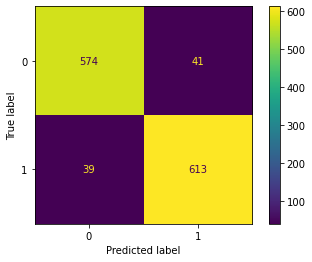

In [22]:
cm = confusion_matrix(y_test,y_pred) # Confusion Matrix of PA Classifier
ls = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls)
disp.plot()
plt.show()